## IMPORTING NECESSARY LIBRARIES

In [15]:
import numpy as np
import pandas as  pd
from sklearn.model_selection import train_test_split
from dateutil.relativedelta import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import joblib

In [16]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# !ls /content/drive/MyDrive/employee_burnout_analysis.xlsx
# to check the path of the dataset you had uploaded in the drive


In [18]:
#upload the dataset file into the google drive
dataset_path = "/content/drive/MyDrive/employee_burnout_analysis.xlsx"
data = pd.read_excel(dataset_path)
data


Employee ID Date of Joining  Gender Company Type  \
0      fffe32003000360033003200      2008-09-30  Female      Service   
1          fffe3700360033003500      2008-11-30    Male      Service   
2      fffe31003300320037003900      2008-03-10  Female      Product   
3      fffe32003400380032003900      2008-11-03    Male      Service   
4      fffe31003900340031003600      2008-07-24  Female      Service   
...                         ...             ...     ...          ...   
22745  fffe31003500370039003100      2008-12-30  Female      Service   
22746  fffe33003000350031003800      2008-01-19  Female      Product   
22747          fffe390032003000      2008-11-05    Male      Service   
22748  fffe33003300320036003900      2008-01-10  Female      Service   
22749      fffe3400350031003800      2008-01-06    Male      Product   

      WFH Setup Available  Designation  Resource Allocation  \
0                      No            2                  3.0   
1                     Yes            1                  2.0   
2                     Yes            2                  NaN   
3                     Yes            1                  1.0   
4                      No            3                  7.0   
...                   ...          ...                  ...   
22745                  No            1                  3.0   
22746                 Yes            3                  6.0   
22747                 Yes            3                  7.0   
22748                  No            2                  5.0   
22749                  No            3                  6.0   

       Mental Fatigue Score  Burn Rate  
0                       3.8       0.16  
1                       5.0       0.36  
2                       5.8       0.49  
3                       2.6       0.20  
4                       6.9       0.52  
...                     ...        ...  
22745                   NaN       0.41  
22746                   6.7       0.59  
22747                   NaN       0.72  
22748                   5.9       0.52  
22749                   7.8       0.61  

[22750 rows x 9 columns]

## LOADING DATASET

## DATA OVERVIEW

In [19]:
data.head()


Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200      2008-09-30  Female      Service   
1      fffe3700360033003500      2008-11-30    Male      Service   
2  fffe31003300320037003900      2008-03-10  Female      Product   
3  fffe32003400380032003900      2008-11-03    Male      Service   
4  fffe31003900340031003600      2008-07-24  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No            2                  3.0                   3.8   
1                 Yes            1                  2.0                   5.0   
2                 Yes            2                  NaN                   5.8   
3                 Yes            1                  1.0                   2.6   
4                  No            3                  7.0                   6.9   

   Burn Rate  
0       0.16  
1       0.36  
2       0.49  
3       0.20  
4       0.52

In [20]:
data.tail()

Employee ID Date of Joining  Gender Company Type  \
22745  fffe31003500370039003100      2008-12-30  Female      Service   
22746  fffe33003000350031003800      2008-01-19  Female      Product   
22747          fffe390032003000      2008-11-05    Male      Service   
22748  fffe33003300320036003900      2008-01-10  Female      Service   
22749      fffe3400350031003800      2008-01-06    Male      Product   

      WFH Setup Available  Designation  Resource Allocation  \
22745                  No            1                  3.0   
22746                 Yes            3                  6.0   
22747                 Yes            3                  7.0   
22748                  No            2                  5.0   
22749                  No            3                  6.0   

       Mental Fatigue Score  Burn Rate  
22745                   NaN       0.41  
22746                   6.7       0.59  
22747                   NaN       0.72  
22748                   5.9       0.52  
22749                   7.8       0.61

In [21]:
data.describe()

Designation  Resource Allocation  Mental Fatigue Score     Burn Rate
count  22750.000000         21369.000000          20633.000000  21626.000000
mean       2.178725             4.481398              5.728188      0.452005
std        1.135145             2.047211              1.920839      0.198226
min        0.000000             1.000000              0.000000      0.000000
25%        1.000000             3.000000              4.600000      0.310000
50%        2.000000             4.000000              5.900000      0.450000
75%        3.000000             6.000000              7.100000      0.590000
max        5.000000            10.000000             10.000000      1.000000

import numpy as np
from google.colab import autoviz
df_8330142713677025784 = autoviz.get_df('df_8330142713677025784')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8330142713677025784, *['Designation'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8330142713677025784 = autoviz.get_df('df_8330142713677025784')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8330142713677025784, *['Resource Allocation'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8330142713677025784 = autoviz.get_df('df_8330142713677025784')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8330142713677025784, *['Mental Fatigue Score'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8330142713677025784 = autoviz.get_df('df_8330142713677025784')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8330142713677025784, *['Burn Rate'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8330142713677025784 = autoviz.get_df('df_8330142713677025784')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8330142713677025784, *['Designation'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8330142713677025784 = autoviz.get_df('df_8330142713677025784')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8330142713677025784, *['Resource Allocation'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8330142713677025784 = autoviz.get_df('df_8330142713677025784')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8330142713677025784, *['Mental Fatigue Score'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8330142713677025784 = autoviz.get_df('df_8330142713677025784')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8330142713677025784, *['Burn Rate'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8330142713677025784 = autoviz.get_df('df_8330142713677025784')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_8330142713677025784, *[[['Designation', 'Resource Allocation'], ['Resource Allocation', 'Mental Fatigue Score'], ['Mental Fatigue Score', 'Burn Rate']]], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [22]:
data.shape

(22750, 9)

In [23]:
data.size

204750

In [24]:
data.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [25]:
data.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [27]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [28]:
data.isnull().sum().values.sum()

4622

## Exploratory Data Analysis

There are NaN values on our target ("Burn Rate") and also in Resource Allocation and Mental Fatigue Score columns. As we are going to perform supervised linear regression, our target variable is needed to do so. Therefore, this 1124 rows with NaN values must be dropped off of our dataframe.


In [29]:
data.corr(numeric_only=True)['Burn Rate'][:-1]


Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Name: Burn Rate, dtype: float64

These two variables are strongly correlated with target variable, therefore , important to estimate it.

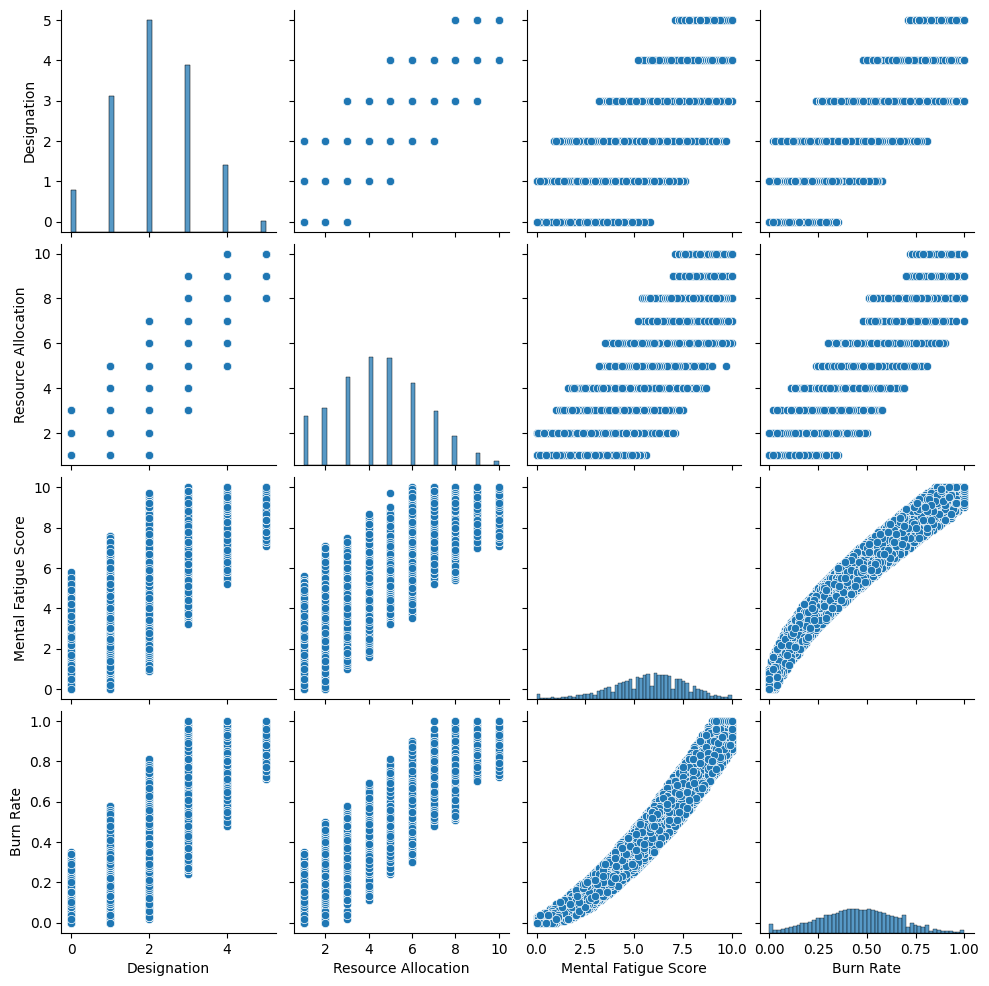

In [30]:
sns.pairplot(data)
plt.show()

Drop off all observations with NaN values of our dataframe.

In [31]:
data = data.dropna()


In [32]:
data.shape

(18590, 9)

Analyzing what type of data is each variable.

In [33]:
data.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

 The values that each variable contains.

In [34]:
data_obj = data.select_dtypes(object)
# prints a dictionary of max 10 unique values for each non-numeric column
pprint({ c : data_obj[c].unique()[:10] for c in data_obj.columns})


{'Company Type': array(['Service', 'Product'], dtype=object),
 'Employee ID': array(['fffe32003000360033003200', 'fffe3700360033003500',
       'fffe32003400380032003900', 'fffe31003900340031003600',
       'fffe3300350037003500', 'fffe33003300340039003100',
       'fffe32003600320037003400', 'fffe33003100330032003700',
       'fffe3400310035003800', 'fffe33003100330036003300'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'WFH Setup Available': array(['No', 'Yes'], dtype=object)}


 The employees ID doesn't provide any useful information and, therefore, they must be dropped.

In [35]:
data = data.drop('Employee ID', axis = 1)


In [36]:
data.head()

Date of Joining  Gender Company Type WFH Setup Available  Designation  \
0      2008-09-30  Female      Service                  No            2   
1      2008-11-30    Male      Service                 Yes            1   
3      2008-11-03    Male      Service                 Yes            1   
4      2008-07-24  Female      Service                  No            3   
5      2008-11-26    Male      Product                 Yes            2   

   Resource Allocation  Mental Fatigue Score  Burn Rate  
0                  3.0                   3.8       0.16  
1                  2.0                   5.0       0.36  
3                  1.0                   2.6       0.20  
4                  7.0                   6.9       0.52  
5                  4.0                   3.6       0.29

Checking the correlation of Date of Joining with Target variable

Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


<ipython-input-37-cd8099dca387>:5: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  data_month["Date_of_Joining"] = data_month ['Date of Joining'].astype("datetime64")


<Axes: xlabel='Month', ylabel='Hired employees'>

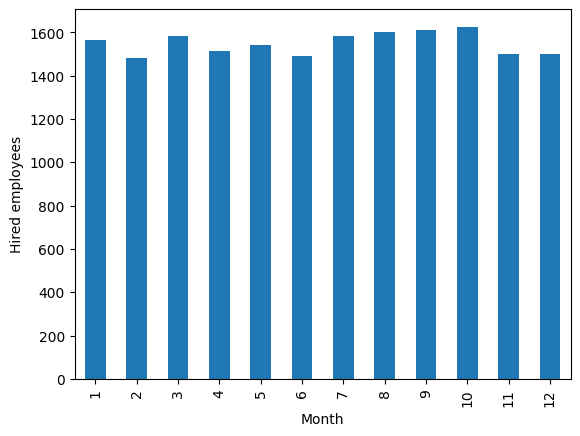

In [37]:
print(f"Min date {data['Date of Joining'].min()}")
print(f"Max date {data ['Date of Joining'].max()}")
data_month = data.copy()

data_month["Date_of_Joining"] = data_month ['Date of Joining'].astype("datetime64")
data_month.Date_of_Joining.groupby(
        data_month['Date of Joining'].dt.month
    ).count().plot(kind="bar", xlabel='Month', ylabel = "Hired employees")

 The date of joining is uniform distributed with values between 2008-01-01 and 2008-12-31. So in order to create a new feature which represents the labor seniority, we could create a variable with de days worked

In [38]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
data["Days"] = data['Date of Joining'].astype("datetime64").sub(data_2008).dt.days
data.Days

<ipython-input-38-b2013518eaad>:2: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  data["Days"] = data['Date of Joining'].astype("datetime64").sub(data_2008).dt.days


0        273
1        334
3        307
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748      9
22749      5
Name: Days, Length: 18590, dtype: int64

In [39]:
data.corr()['Burn Rate']


<ipython-input-39-7e647aef01c7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Burn Rate']


Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64

In [40]:
data.corr(numeric_only=True)['Burn Rate'][:]

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64

We observed that there is no strong correlation between Date of Joining and Burn Rate.So, we are dropping the column Date of Joining.

In [41]:
data = data.drop(['Date of Joining','Days'], axis = 1)

In [42]:
data.head()

Gender Company Type WFH Setup Available  Designation  Resource Allocation  \
0  Female      Service                  No            2                  3.0   
1    Male      Service                 Yes            1                  2.0   
3    Male      Service                 Yes            1                  1.0   
4  Female      Service                  No            3                  7.0   
5    Male      Product                 Yes            2                  4.0   

   Mental Fatigue Score  Burn Rate  
0                   3.8       0.16  
1                   5.0       0.36  
3                   2.6       0.20  
4                   6.9       0.52  
5                   3.6       0.29

Now  analysing the categorical variables

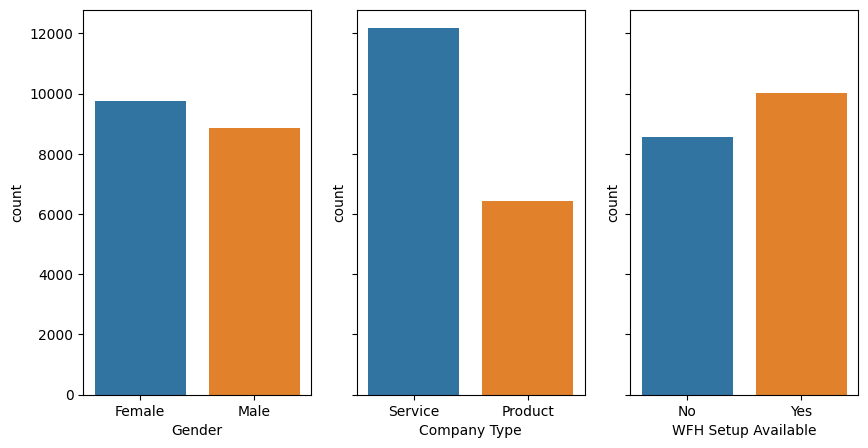

In [43]:
cat_columns = data.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10, 5))
for i, c in enumerate(cat_columns):
    sns.countplot(x=c, data=data, ax=ax[i])
plt.show()


The number of observations of each category on each variable is equally distributed, except to the Company_Type where the number of service jobs its almost twice that of product ones.


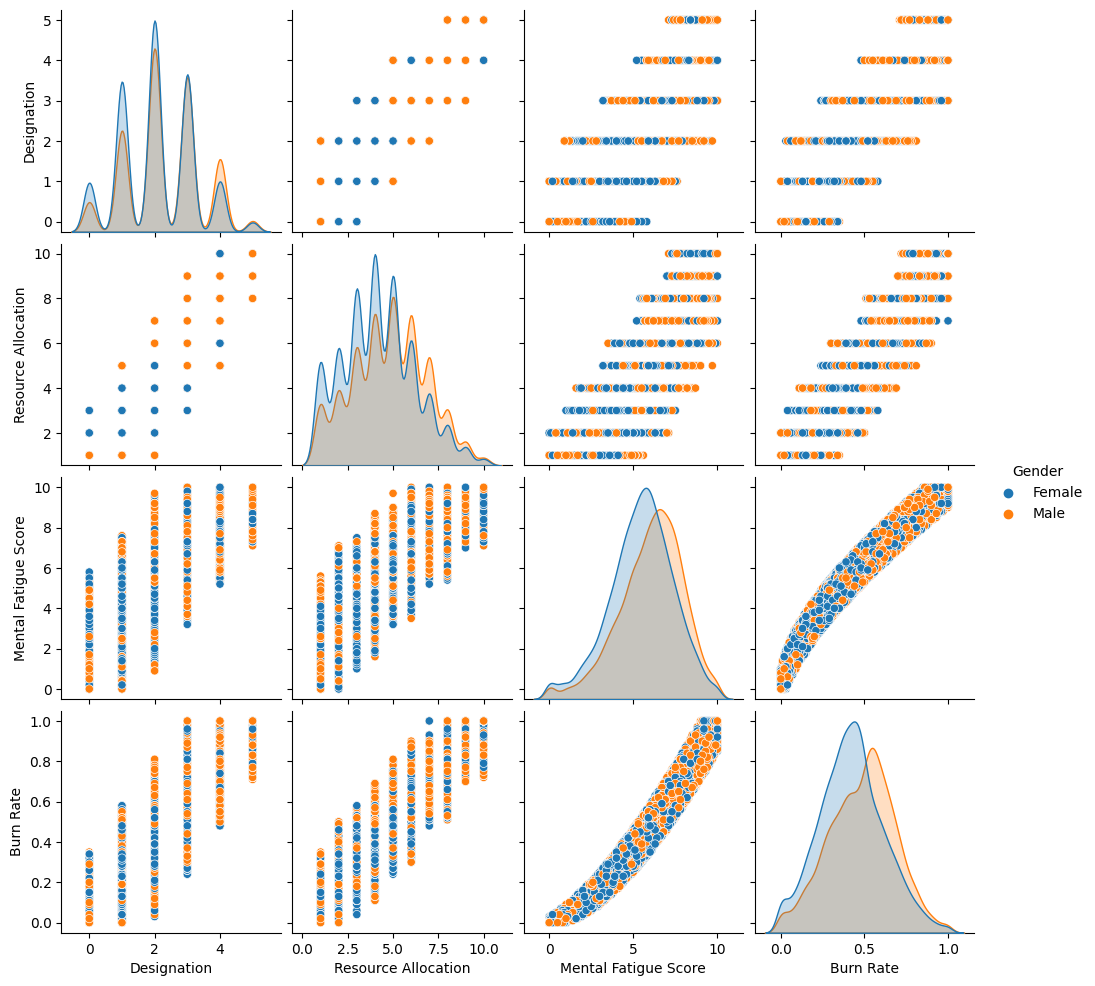

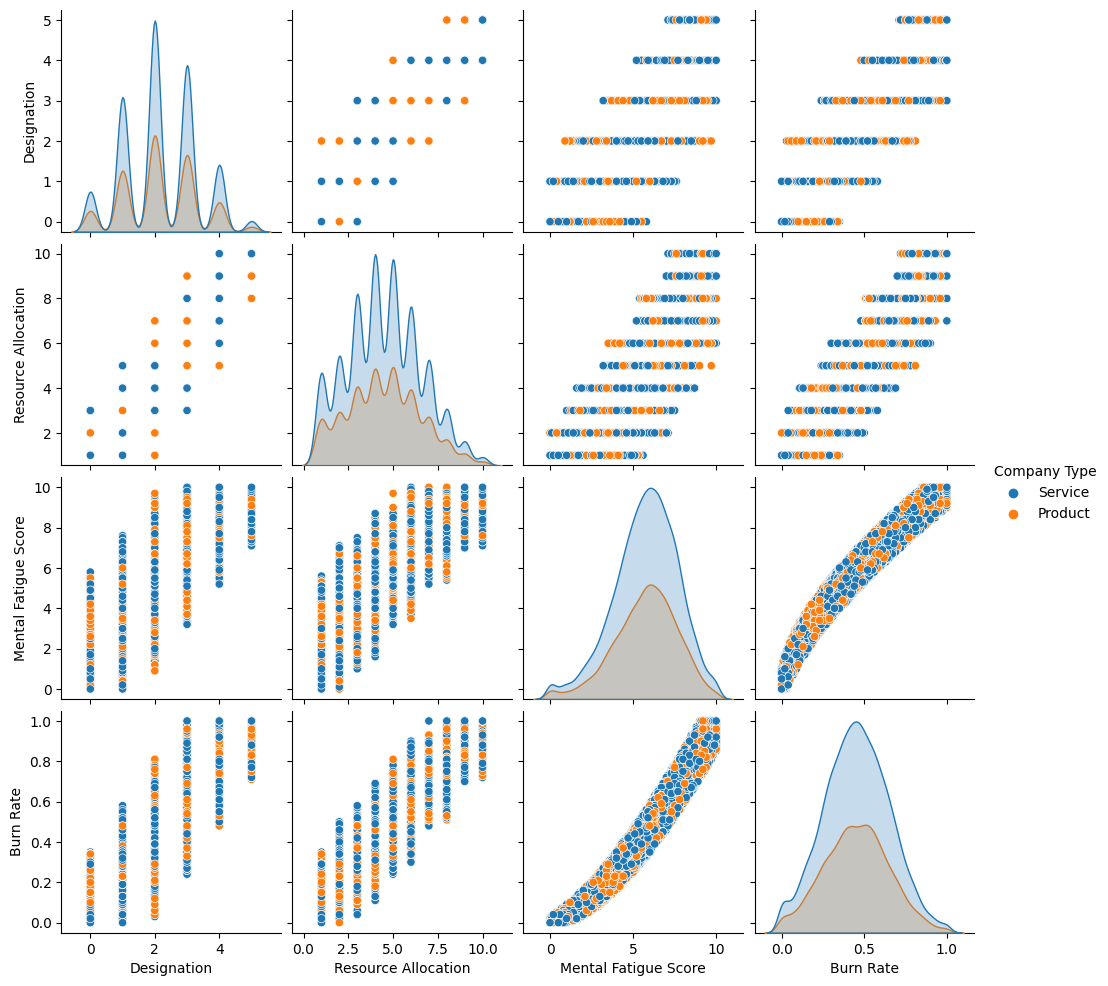

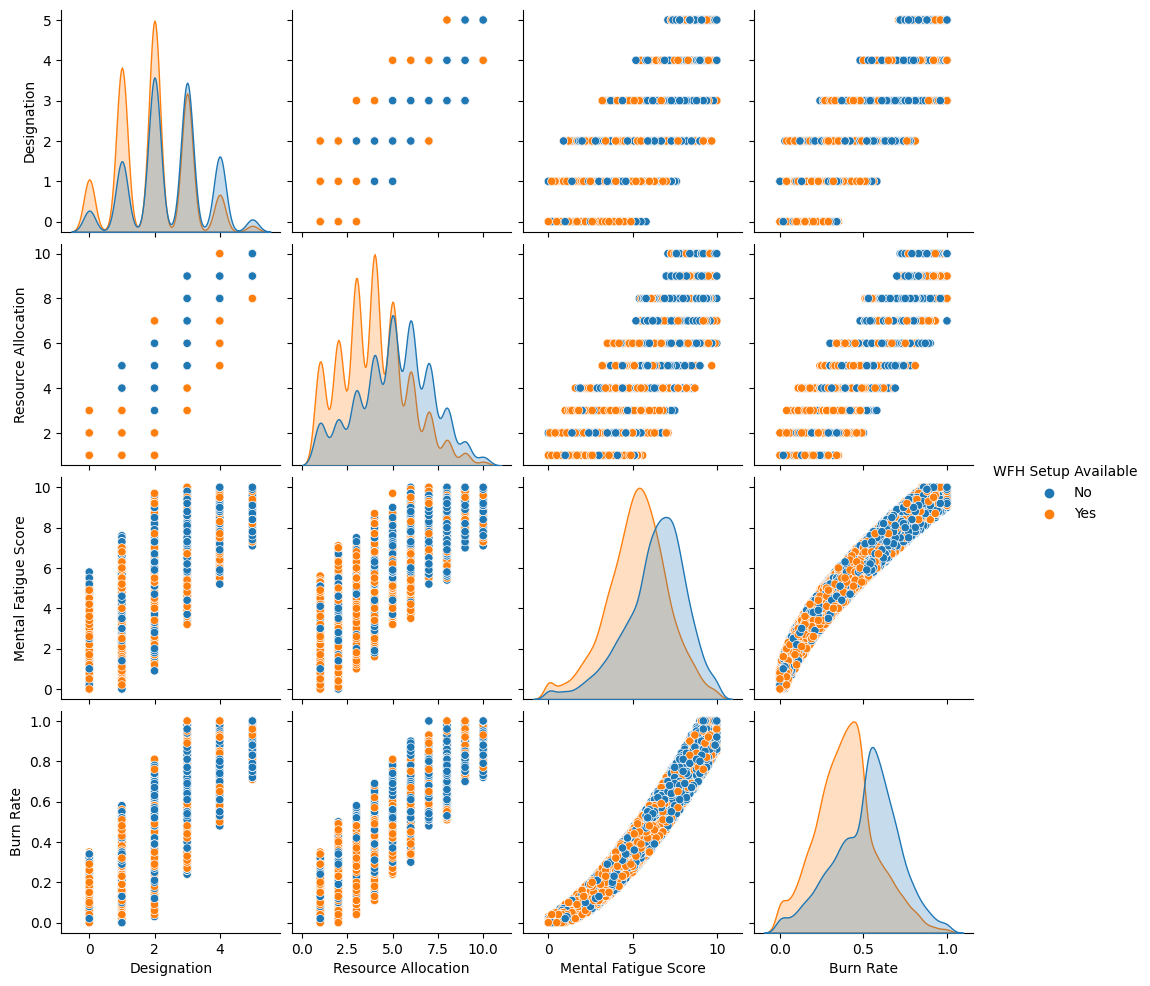

In [44]:
for c in data.select_dtypes(object).columns:
    sns.pairplot(data, hue=c)
plt.show()

In [45]:
data.columns

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

One-Hot Encoding for categorical features

In [46]:
data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available',
       'Gender'], drop_first=True)
data.head()
encoded_columns = data.columns



In [47]:
joblib.dump(encoded_columns, 'encoder.pkl')

['encoder.pkl']

# Preprocessing

In [48]:
# Split df into X and y
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)


In [49]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns )

In [50]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [51]:
X_train

Designation  Resource Allocation  Mental Fatigue Score  \
8977      0.723327             0.250185             -0.061773   
14115    -0.159330             0.250185             -0.941481   
8797      0.723327             0.250185              0.973179   
1173     -1.041987            -1.214568             -0.579248   
1941     -0.159330             0.738436              1.180169   
...            ...                  ...                   ...   
13453     0.723327             1.226687              1.645897   
21179     0.723327             0.250185             -1.044976   
6327      0.723327             0.250185              0.093470   
14933    -0.159330             0.250185              0.714441   
288      -0.159330             0.250185              1.076674   

       Company Type_Service  WFH Setup Available_Yes  Gender_Male  
8977               0.724706                -1.082297     1.051505  
14115              0.724706                -1.082297    -0.951018  
8797               0.724706                -1.082297    -0.951018  
1173              -1.379869                -1.082297    -0.951018  
1941              -1.379869                 0.923961     1.051505  
...                     ...                      ...          ...  
13453             -1.379869                 0.923961    -0.951018  
21179              0.724706                 0.923961     1.051505  
6327               0.724706                -1.082297     1.051505  
14933              0.724706                -1.082297     1.051505  
288               -1.379869                -1.082297    -0.951018  

[13013 rows x 6 columns]

In [52]:
y_train

8977     0.41
14115    0.34
8797     0.61
1173     0.35
1941     0.61
         ... 
13453    0.78
21179    0.30
6327     0.42
14933    0.54
288      0.57
Name: Burn Rate, Length: 13013, dtype: float64

## Model Building

## Linear Regression

In [53]:
LinearRegression = LinearRegression()
LinearRegression.fit(X_train, y_train)




LinearRegression()

In [54]:
print("Linear Regression:\n")
# Make predictions on the test set
y_pred = LinearRegression.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Linear Regression:

Mean Squared Error: 0.0031569779113610717
Root Mean Squared Error: 0.0561869905882231
Mean Absolute Error: 0.04595032032644773
R-squared Score: 0.918822674247248


In [55]:
feature_names = X.columns.tolist()
feature_names

['Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Company Type_Service',
 'WFH Setup Available_Yes',
 'Gender_Male']

In [56]:
# Save the model to a file
joblib.dump(LinearRegression, 'model.pkl')

['model.pkl']

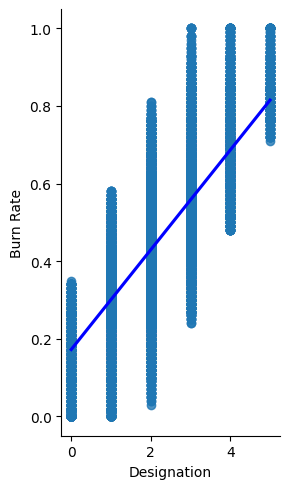

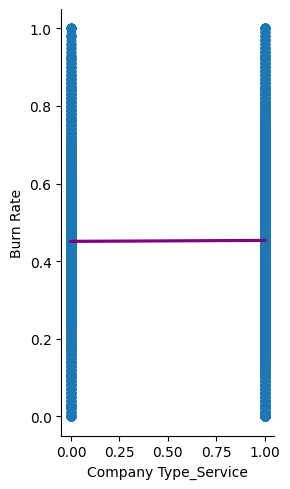

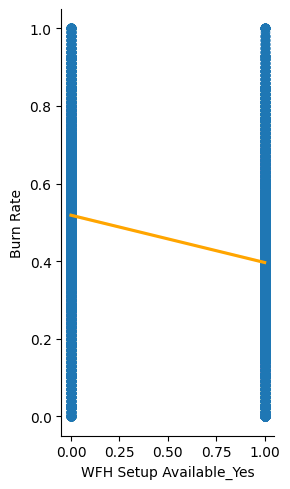

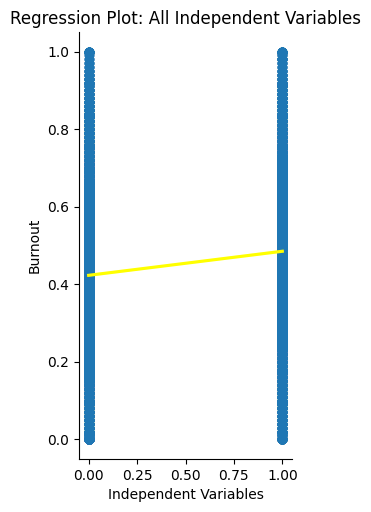

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the independent variables and target variable
independent_vars = ['Mental Fatigue Score', 'Designation', 'Resource Allocation', 'Company Type_Service', 'WFH Setup Available_Yes', 'Gender_Male']
target_variable = 'Burn Rate'

# Select the independent variables and target variable from the dataset
data_selected = data[independent_vars + [target_variable]]

# Plot the regression plot with all independent variables
sns.lmplot(x='Mental Fatigue Score', y=target_variable, data=data_selected, aspect=0.6, palette='coolwarm', line_kws={'color': 'red'})
sns.lmplot(x='Designation', y=target_variable, data=data_selected, aspect=0.6, palette='coolwarm', line_kws={'color': 'blue'})
sns.lmplot(x='Resource Allocation', y=target_variable, data=data_selected, aspect=0.6, palette='coolwarm', line_kws={'color': 'green'})
sns.lmplot(x='Company Type_Service', y=target_variable, data=data_selected, aspect=0.6, palette='coolwarm', line_kws={'color': 'purple'})
sns.lmplot(x='WFH Setup Available_Yes', y=target_variable, data=data_selected, aspect=0.6, palette='coolwarm', line_kws={'color': 'orange'})
sns.lmplot(x='Gender_Male', y=target_variable, data=data_selected, aspect=0.6, palette='coolwarm', line_kws={'color': 'yellow'})

# Set labels and title
plt.xlabel('Independent Variables')
plt.ylabel('Burnout')
plt.title('Regression Plot: All Independent Variables')

# Show the plot
plt.show()


# Support Vector Machine(Linear Kernel)

In [58]:
SVMLinear = LinearSVR()
SVMLinear.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [59]:
print("Support Vector Machine (Linear Kernel)\n")
# Make predictions on the test set
y_pred = SVMLinear.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Support Vector Machine (Linear Kernel)

Mean Squared Error: 0.003187417079284682
Root Mean Squared Error: 0.056457214590207
Mean Absolute Error: 0.0459731752183918
R-squared Score: 0.9180399730945775


## Support Vector Machine (RBF Kernel)

In [60]:
SVMRbf = SVR()
SVMRbf.fit(X_train, y_train)

SVR()

In [61]:
print("Support Vector Machine (RBF Kernel)\n")
# Make predictions on the test set
y_pred = SVMRbf.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Support Vector Machine (RBF Kernel)

Mean Squared Error: 0.00341204574122986
Root Mean Squared Error: 0.058412719002199
Mean Absolute Error: 0.04962241383880883
R-squared Score: 0.9122639573681112


## Random Forest Reggressor

In [62]:
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
print("RandomForestRegressor\n")
# Make predictions on the test set
y_pred = RandomForest.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

RandomForestRegressor

Mean Squared Error: 0.0033813858736388997
Root Mean Squared Error: 0.05814968506912913
Mean Absolute Error: 0.04593496629664646
R-squared Score: 0.9130523335078398


In [67]:
#prediction
pred = LinearRegression.predict(X_test)
print(pred)

[0.42995313 0.18546762 0.55552742 ... 0.38424784 0.56626681 0.26399529]


Based on the evaluation metrics, the Linear Regression model appears to be the best model for predicting burnout analysis. It has the lowest mean squared error, root mean squared error, and mean absolute error, indicating better accuracy and precision in its predictions. Additionally, it has the highest R-squared score, indicating a good fit to the data and explaining a higher proportion of the variance in the target variable.So we are choosing this model for deployment.